# 1 Round Convolution Audits

Code in file: one_round_stopping_probs.py

The code in this file allows for the comparison of a convolution audit limited to one round of a given size and a BRAVO audit of the same size. Given a reported tally for an election, we can compare the $k_{min}$ values for each audit as well as the associated stopping porbabilities. 


In [1]:
from one_round_stopping_probs import stoppingcompare

## stoppingcompare

Python class to run 1 round convolution and BRAVO audits on an election wiht given specifications. 

Methods:
- `makegraphs()`: Create 2 graphs, 1 comapring $k_{min}$ values, 1 comparing stopping porbabilities, output using `matplotlib.pyplot`.
- `bravo_sprob_all(int n, int kmin)`
- `bravo_sprob_unique(int n, int kmin, int k_min1)`
- `kmins_graph()`
- `sprobs_graph()`
- `display_graphs()`

### Creating an object

To create a `stoppingcompare` object, we pass the constructor information about the election, a risk limit, and a list of the different sample sizes we want to compare. For each value in the list of round/sample sizes two $k_{min}$ values will be generated: 1 for a convolution audit of exactly that round size and 1 for a BRAVO audit (w/ replacement) which stopping at that size.

The following code creates an election comparision object for an election with:
- 100,000 total votes cast
- 20% reported marign for winner
- 10% risk limit

and compares the two audits at each of 100, 200, 400, 800, 1600, and 3200 sample sizes. 

In [2]:
audit_compare = stoppingcompare(100000, 0.2, [100, 200, 400, 800, 1600, 3200], 0.1)


### Generating Comparison Graphs

Once a `stoppingcompare` object has ben created, it can be used to generate grpahsa comparing the $k_{min}$ values and stopping probabilities of the Convlution and BRAVO audits. To generate these graphs simple call the `makegraphs()` method as shown below.

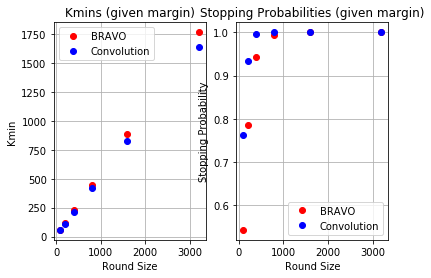

In [3]:
audit_compare.makegraphs()

#### How the graphs are generated

`makegraphs()` performs several operations:
1. For each round size, a convolution audit $k_{min}$ value is generated using the `Convlution_Audit` class, where the audit is limited to 1 round, the current round size, and all of the risk limit is focussed on this round. 
2. For each round size, a BRAVO $k_{min}$ estimate is generated. This is done by solving **(insert equation form BRAVO paper)** for the minimum number of votes needed to be found for the winner given the current round size. *Note that in a traditional BRAVO audit with replacement where ballots are drawn one by one, it would be possible to stop the audit before reaching the round size.*
3. For each $k_{min}$ value a stopping porbability is calculated. For the convolution audit, this is the right tail of current distrbution. For the BRAVO audit one of `bravo_sprob_unique()` or `bravo_sprob_all()` is used. *Code currently uses `bravo_sprob_all()`*.
4. Once all the data has been generated and stored in arrays, `display_grpahs()` is called to generate, format, and display both graphs. *To display graphs separately, use `kmins_graph()` and/or `sprons_graph()`*.


### `bravo_sprob_unique()` vs. `bravo_sprob_all()`



## Examples